<a href="https://colab.research.google.com/github/aryachandrak/Machine-Learning-2024-Ganjil/blob/main/Jobsheet3/Tugas_Praktikum_JS3_Kelompok_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TUGAS PRAKTIKUM JOBSHEET 3
**Kelompok 1:**
1. Arya Chandra
2. Elis Nurhidayati
3. Jantra Lang Lang B
4. Putri Ayu Aliciawati

##Tugas 1: Multiple Linear Regression
1. Identifikasi variabel-variabel yang akan digunakan sebagai variabel bebas (fitur) dan variabel target (biaya medis personal).
2. Bagi dataset menjadi data latih (train) dan data uji (test) dengan proporsi yang sesuai.
3. Lakukan feature scaling jika diperlukan.
4. Buat model multiple linear regression menggunakan Scikit-Learn.
5. Latih model pada data latih dan lakukan prediksi pada data uji.
6. Evaluasi model dengan menghitung metrik seperti R-squared, MSE, dan MAE. Tampilkan hasil evaluasi.

Catatan Tambahan:
- Pastikan untuk memberikan penjelasan singkat tentang dataset yang digunakan, termasuk deskripsi variabel-variabel yang relevan.
- Tampilkan visualisasi data yang relevan seperti scatter plot atau grafik lainnya jika diperlukan untuk pemahaman yang lebih baik.
- Analisis hasil yang Anda dapatkan dalam tugas praktikum Anda.

## 1. Identifikasi variabel bebas (fitur) dan variabel target (biaya medis personal)

In [ ]:
import numpy as np
import pandas as pd
data = pd.read_csv('insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Mengidentifikasi variabel:

Variabel bebas/fitur (X) adalah fitur yang digunakan untuk memprediksi atau menjelaskan variabel target. Dalam dataset insurance.csv, variabel-variabel berikut digunakan sebagai fitur:
- 'usia'
- 'jenis kelamin'
- 'bmi'
- 'anak-anak'
- 'perokok'
- 'wilayah'

Sementara itu variabel target (y) adalah variabel yang ingin kita prediksi atau analisis. Dalam dataset insurance.csv, variabel target yaitu 'biaya'.

**Dibawah ini beberapa visualisasi hubungan antara variabel X dan Y**

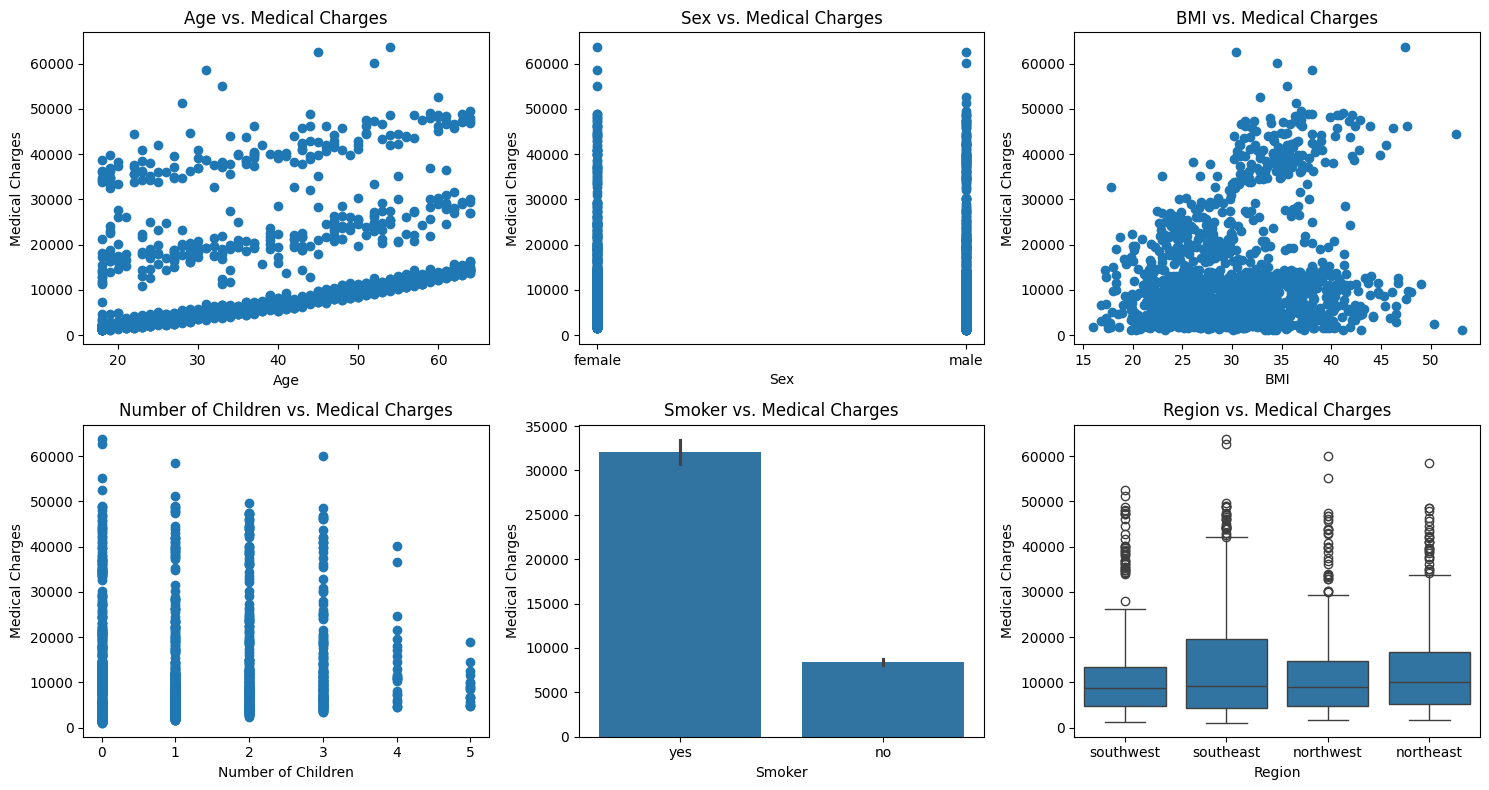

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Buat subplots dengan 3 kolom per baris
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))

# Plot Age vs. Medical Charges
axes[0, 0].scatter(data['age'], data['charges'])
axes[0, 0].set_title('Age vs. Medical Charges')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Medical Charges')

# Plot Sex vs. Medical Charges
axes[0, 1].scatter(data['sex'], data['charges'])
axes[0, 1].set_title('Sex vs. Medical Charges')
axes[0, 1].set_xlabel('Sex')
axes[0, 1].set_ylabel('Medical Charges')

# Plot BMI vs. Medical Charges
axes[0, 2].scatter(data['bmi'], data['charges'])
axes[0, 2].set_title('BMI vs. Medical Charges')
axes[0, 2].set_xlabel('BMI')
axes[0, 2].set_ylabel('Medical Charges')

# Plot Number of Children vs. Medical Charges
axes[1, 0].scatter(data['children'], data['charges'])
axes[1, 0].set_title('Number of Children vs. Medical Charges')
axes[1, 0].set_xlabel('Number of Children')
axes[1, 0].set_ylabel('Medical Charges')

# Plot Smoker vs. Medical Charges (Bar Plot)
sns.barplot(x='smoker', y='charges', data=data, ax=axes[1, 1])
axes[1, 1].set_title('Smoker vs. Medical Charges')
axes[1, 1].set_xlabel('Smoker')
axes[1, 1].set_ylabel('Medical Charges')

# Plot Region vs. Medical Charges (Box Plot)
sns.boxplot(x='region', y='charges', data=data, ax=axes[1, 2])
axes[1, 2].set_title('Region vs. Medical Charges')
axes[1, 2].set_xlabel('Region')
axes[1, 2].set_ylabel('Medical Charges')

# Adjust the layout
plt.tight_layout()
plt.show()


## 2. Membagi dataset menjadi data train dan test

In [ ]:
from sklearn.model_selection import train_test_split
X = pd.concat([X_std, X_encoded], axis=1) #proses penggabungan data standarisasi dan encoding
y = data['charges']

# Membagi dataset menjadi data latih dan data uji (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Melihat bentuk data yang dihasilkan
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (1070, 6)
Shape of X_test: (268, 6)
Shape of y_train: (1070,)
Shape of y_test: (268,)


Dalam kode ini, pertama-tama dilakukan penggabungan antara data yang telah distandarisasi (`X_std`) dan data yang telah diencoding (`X_encoded`) untuk membentuk DataFrame lengkap `X` yang siap digunakan dalam pelatihan model. Variabel target `y` diambil dari kolom `charges` dalam dataset, yang merupakan nilai yang akan diprediksi oleh model. Selanjutnya, dataset dibagi menjadi dua bagian menggunakan `train_test_split`: 80% data digunakan untuk pelatihan (`X_train` dan `y_train`), dan 20% untuk pengujian (`X_test` dan `y_test`). Parameter `random_state=42` memastikan pembagian data dapat direproduksi dengan konsisten setiap kali kode dijalankan. Terakhir, bentuk dari data latih dan data uji ditampilkan untuk memverifikasi bahwa pembagian data telah dilakukan dengan benar, memastikan bahwa ukuran data sesuai dengan yang diharapkan.

## 3. Melakukan feature scalling

In [ ]:
x = data[['age', 'bmi', 'children']]

# Mengambil data numerik untuk distandarisasi

In [ ]:
x_sc = StandardScaler()
X_std = x_sc.fit_transform(x)
X_std = pd.DataFrame(X_std, columns=['age_std', 'bmi_std', 'children_std']) #dijadikan dataframe agar bisa digabung dengan data encoding sebelumnya

# Data telah berhasil distandarisasi

Kode ini melakukan proses standarisasi pada data numerik. Pertama, variabel `x` diambil dari kolom-kolom numerik `age`, `bmi`, dan `children` dalam dataset. Kemudian, `StandardScaler` digunakan untuk menstandarisasi data tersebut sehingga setiap fitur memiliki rata-rata 0 dan deviasi standar 1. Proses ini dilakukan dengan `x_sc.fit_transform(x)`, yang menghasilkan array numpy dengan nilai-nilai yang telah distandarisasi. Array ini kemudian diubah kembali menjadi DataFrame dengan nama kolom baru `['age_std', 'bmi_std', 'children_std']`, menggunakan `pd.DataFrame()`.

## 4. Buat model multiple linear regression menggunakan Scikit-Learn.

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

Dalam kode ini, objek model regresi linier dibuat menggunakan kelas `LinearRegression` yang diimpor dari pustaka `scikit-learn`. Dengan perintah `model = LinearRegression()`, sebuah instance baru dari kelas tersebut didefinisikan, yang siap digunakan untuk membangun model regresi linier. Model ini akan digunakan untuk mengidentifikasi dan memodelkan hubungan antara fitur-fitur input (variabel independen) dan variabel target (variabel dependen) dalam dataset. Setelah objek model ini dibuat, model dapat dilatih dengan data menggunakan metode `fit()`, membuat prediksi dengan metode `predict()`, dan mengevaluasi kinerjanya menggunakan berbagai metrik evaluasi.

## 5. Latih model pada data latih dan lakukan prediksi pada data uji.

In [ ]:
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

Dalam kode ini, langkah pertama adalah melatih model regresi linier dengan menggunakan metode `fit()`, di mana `model.fit(X_train, y_train)` melatih model berdasarkan data latih `X_train` dan target `y_train`. Proses pelatihan ini memungkinkan model untuk memahami hubungan antara fitur-fitur input dan variabel target. Setelah model dilatih, langkah berikutnya adalah membuat prediksi dengan menggunakan data uji. Metode `predict()` digunakan untuk menghasilkan prediksi berdasarkan data uji `X_test`, dan hasilnya disimpan dalam variabel `y_pred`. Prediksi ini menunjukkan estimasi nilai variabel target untuk data uji dan dapat digunakan untuk mengevaluasi kinerja model.

## 6. Melakukan Validasi Hasil

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mea = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error : {mea}')
print(f'Mean Squared Error : {mse}')
print(f'R2 Score : {r2}')

Mean Absolute Error : 4186.508898366432
Mean Squared Error : 33635210.431178406
R2 Score : 0.7833463107364539


Dalam kode ini, tiga metrik evaluasi digunakan untuk menilai kinerja model regresi linier. Pertama, `mean_absolute_error(y_test, y_pred)` menghitung rata-rata absolut dari selisih antara nilai sebenarnya dan nilai yang diprediksi, memberikan ukuran seberapa besar rata-rata kesalahan prediksi. Kedua, `mean_squared_error(y_test, y_pred)` mengukur rata-rata kuadrat dari selisih antara nilai sebenarnya dan nilai prediksi, yang lebih sensitif terhadap kesalahan besar. Ketiga, `r2_score(y_test, y_pred)` menghitung koefisien determinasi R², yang menunjukkan seberapa baik model menjelaskan variasi dalam data target, dengan nilai mendekati 1 menunjukkan model yang baik. Ketiga metrik ini dicetak untuk memberikan gambaran tentang akurasi dan efektivitas model regresi linier dalam melakukan prediksi.  

Hasil evaluasi model regresi linier menunjukkan bahwa Mean Absolute Error (MAE) adalah 4186.51, Mean Squared Error (MSE) adalah 33,635,210.43, dan R² Score adalah 0.78. Ini berarti model memiliki kesalahan rata-rata sekitar 4186.51 unit, kesalahan kuadrat rata-rata sekitar 33,635,210.43 unit kuadrat, dan mampu menjelaskan 78% dari variasi dalam data target. Ini menunjukkan bahwa model regresi linier memiliki kinerja yang baik dalam memodelkan hubungan antara fitur dan variabel target.